# Name : Sayan De
### Roll :  FT252082

In [177]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [178]:
#Importing dataset
df = pd.read_excel('Bank Customer_v0.1.xlsx')

### Data Overview

In [179]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
0,NaN,technician,single,tertiary,no,2625,no,no,cellular,29,jul,2516,2.0,-1,NaN,unknown,yes,0.708652
1,39.0,blue-collar,single,primary,no,0,yes,yes,cellular,13,may,1975,5.0,-1,NaN,unknown,yes,0.575370
2,30.0,technician,married,tertiary,no,296,no,no,cellular,22,aug,1809,5.0,-1,0.0,unknown,no,0.473304
3,32.0,admin.,single,secondary,no,678,yes,no,cellular,4,feb,1579,1.0,246,NaN,failure,yes,0.306150
4,31.0,management,divorced,tertiary,no,254,no,no,cellular,18,aug,1576,8.0,-1,NaN,unknown,yes,0.155055


In [51]:
df.shape

(1000, 18)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           963 non-null    float64
 1   job           1000 non-null   object 
 2   marital       988 non-null    object 
 3   education     1000 non-null   object 
 4   default       1000 non-null   object 
 5   balance       1000 non-null   int64  
 6   housing       1000 non-null   object 
 7   loan          1000 non-null   object 
 8   contact       979 non-null    object 
 9   day           1000 non-null   int64  
 10  month         1000 non-null   object 
 11  duration      1000 non-null   int64  
 12  campaign      994 non-null    float64
 13  pdays         1000 non-null   int64  
 14  previous      110 non-null    float64
 15  poutcome      1000 non-null   object 
 16  term_deposit  1000 non-null   object 
 17  rand          1000 non-null   float64
dtypes: float64(4), int64(4), obje

# Questions

1.As a data analyst at the bank, identify any fields in the customer dataset that contain null values. Develop a strategy to address these missing values to ensure data integrity. Consider methods such as imputation, deletion, or using statistical techniques to fill in gaps. Document the chosen method and justify its suitability for maintaining the dataset's accuracy.

In [180]:
#checking null values
df.isnull().sum()

age              37
job               0
marital          12
education         0
default           0
balance           0
housing           0
loan              0
contact          21
day               0
month             0
duration          0
campaign          6
pdays             0
previous        890
poutcome          0
term_deposit      0
rand              0
dtype: int64

### Strategy for Addressing Missing Values

- **Age**: We have imputed the missing values with the average age of customers, as accurate age data is essential for demographic analysis and targeted marketing.
- **Marital Status**: We have used the mode to impute missing values, as this is a categorical variable and the mode represents the most frequent category.
- **Contact**: We have replaced missing values with "Number not provided."
- **Campaign**: Imputed missing values with the median number of campaigns, as this reduces the impact of outliers.
- **Previous**: as the column has 89%(890/1000) null values , we can drop the column

In [181]:
# as the previous col has 89%(890/1000) null values , we can drop the column
df.drop(columns = 'previous', inplace = True)

Age

In [182]:
df['age'].fillna(df['age'].mean,inplace = True)

Marital Status

In [183]:
df['marital'].fillna(df['marital'].mode()[0], inplace=True)

Contact Standardization

In [184]:
df['contact'].fillna('Number not provided', inplace=True)

Campaign

In [185]:
# Impute missing campaign values with median
df['campaign'].fillna(df['campaign'].median(), inplace=True)

### Validating after replacing all the Null values

In [186]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
poutcome        0
term_deposit    0
rand            0
dtype: int64

In [187]:
#new dataset dimension after deleting the NULL records
df.shape

(1000, 17)

2.The marketing team needs accurate age data for targeted campaigns. Fill in the missing age values by calculating the average age of customers and round it to the nearest whole number. Explain the impact of this imputation on the overall data distribution and how it helps in creating accurate customer profiles.

In [193]:
df = pd.read_excel('Bank Customer_v0.1.xlsx')
df.drop(columns = 'previous', inplace = True)

In [58]:
df['age'].isnull().sum()

37

So, there are 37 Null values in the Age column

In [59]:
# we will replace the NULL with the mean of the age column
df['age'].fillna(df['age'].mean,inplace = True)

In [32]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,term_deposit,rand
0,41.0,technician,single,tertiary,no,2625,no,no,cellular,29,jul,2516,2.0,-1,unknown,yes,0.354492
1,39.0,blue-collar,single,primary,no,0,yes,yes,cellular,13,may,1975,5.0,-1,unknown,yes,0.003189
2,30.0,technician,married,tertiary,no,296,no,no,cellular,22,aug,1809,5.0,-1,unknown,no,0.606283
3,32.0,admin.,single,secondary,no,678,yes,no,cellular,4,feb,1579,1.0,246,failure,yes,0.088074
4,31.0,management,divorced,tertiary,no,254,no,no,cellular,18,aug,1576,8.0,-1,unknown,yes,0.777826
5,27.0,admin.,married,secondary,no,-97,yes,no,Number not provided,18,jun,1528,2.0,-1,unknown,yes,0.955724
6,53.0,blue-collar,married,primary,no,751,yes,no,cellular,3,feb,1528,2.0,-1,unknown,yes,0.657397
7,40.0,technician,married,secondary,yes,-432,yes,yes,cellular,20,aug,1464,3.0,-1,unknown,no,0.559552
8,41.0,blue-collar,divorced,secondary,no,5291,yes,no,Number not provided,14,may,1423,3.0,-1,unknown,yes,0.650022
9,55.0,retired,divorced,secondary,no,-268,no,yes,cellular,24,jul,1417,1.0,-1,unknown,yes,0.300277


### Analysis
Imputing missing age values with the average ensures the dataset's completeness, crucial for accurate demographic analysis and targeted marketing. This method maintains the central tendency of the age variable with minimal impact on the overall distribution. By filling in these gaps, the bank can create detailed customer profiles, enabling precise segmentation for marketing campaigns and enhancing analytical accuracy. Despite a slight reduction in variance, the benefits of having a complete dataset, such as improved predictive modeling and informed decision-making, outweigh the minor distribution changes, leading to more effective customer engagement strategies.

3.Management is interested in understanding customer interaction durations. Provide an analysis of the central tendency of the 'duration' field to help them gauge average call lengths. Discuss how this information can be used to optimize customer service processes and improve call center efficiency.

In [60]:
print('The Mean of the duration column is',df['duration'].mean())

The Mean of the duration column is 252.918


In [61]:
print('The variance of the duration column is',df['duration'].var())

The variance of the duration column is 64276.23751351356


In [62]:
print('The standard deviation of the duration column is',df['duration'].std())

The standard deviation of the duration column is 253.52758728294947


### Analysis:
Analyzing the central tendency of call durations helps optimize customer service processes by informing resource allocation, training, and quality assurance. Knowing the average call length aids in planning staffing and shifts, reducing customer wait times, and enhancing service efficiency. It also helps identify training needs and establish standard procedures to streamline call handling. Performance metrics can be set using these insights, improving agent efficiency and customer satisfaction.

4.To maintain consistency in customer records, replace all instances of 'unknown' in the 'contact' field with 'Number not provided'. This standardization will ensure uniformity in data entries, making it easier to analyze and interpret customer contact information

In [194]:
df = pd.read_excel('Bank Customer_v0.1.xlsx')

In [195]:
df[df['contact']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
5,27.0,admin.,married,secondary,no,-97,yes,no,unknown,18,jun,1528,2.0,-1,NaN,unknown,yes,0.543888
8,41.0,blue-collar,divorced,secondary,no,5291,yes,no,unknown,14,may,1423,3.0,-1,NaN,unknown,yes,0.860771
12,30.0,admin.,single,secondary,yes,-35,yes,no,unknown,14,may,1204,4.0,-1,NaN,unknown,no,0.747495
17,55.0,retired,divorced,secondary,no,1580,no,yes,unknown,19,jun,1007,1.0,-1,NaN,unknown,yes,0.453069
18,48.0,services,single,secondary,no,220,no,no,unknown,5,jun,1005,2.0,-1,NaN,unknown,no,0.174281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,59.0,blue-collar,married,primary,no,229,yes,yes,unknown,7,may,19,1.0,-1,NaN,unknown,no,0.792753
986,41.0,management,married,tertiary,no,437,yes,no,unknown,3,jun,14,21.0,-1,NaN,unknown,no,0.886389
990,45.0,unemployed,married,secondary,no,736,no,no,unknown,20,jun,13,2.0,-1,NaN,unknown,no,0.693869
996,36.0,services,single,secondary,no,760,no,no,unknown,20,jun,9,13.0,-1,NaN,unknown,no,0.543391


So, there is 292 rows with  have contact = 'unknown'

In [196]:
df['contact'].replace('unknown', 'Number not provided', inplace=True)

In [197]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
0,NaN,technician,single,tertiary,no,2625,no,no,cellular,29,jul,2516,2.0,-1,NaN,unknown,yes,0.708652
1,39.0,blue-collar,single,primary,no,0,yes,yes,cellular,13,may,1975,5.0,-1,NaN,unknown,yes,0.575370
2,30.0,technician,married,tertiary,no,296,no,no,cellular,22,aug,1809,5.0,-1,0.0,unknown,no,0.473304
3,32.0,admin.,single,secondary,no,678,yes,no,cellular,4,feb,1579,1.0,246,NaN,failure,yes,0.306150
4,31.0,management,divorced,tertiary,no,254,no,no,cellular,18,aug,1576,8.0,-1,NaN,unknown,yes,0.155055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28.0,blue-collar,married,secondary,no,373,yes,no,cellular,14,may,10,9.0,344,NaN,failure,no,0.076747
996,36.0,services,single,secondary,no,760,no,no,Number not provided,20,jun,9,13.0,-1,NaN,unknown,no,0.543391
997,35.0,technician,single,tertiary,no,576,no,no,cellular,28,aug,8,13.0,-1,NaN,unknown,no,0.148097
998,NaN,services,married,secondary,no,901,yes,no,Number not provided,20,jun,8,6.0,-1,NaN,unknown,no,0.226016


5.For a targeted analysis of married customers, create a new dataset that excludes the 'default', 'housing', and 'poutcome' fields. This refined dataset will help focus on specific attributes relevant to this group. Explain the rationale behind excluding these fields and how the new dataset can be used for more focused analysis.

In [74]:
df = pd.read_excel('Bank Customer_v0.1.xlsx')

In [76]:
df.drop(columns = ['default','housing','poutcome'], inplace = True)

In [77]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'term_deposit', 'rand'],
      dtype='object')

As we can see the 'default', 'housing', and 'poutcome' columns have been dropped from the dataset

In [78]:
df.head()

,age,job,marital,education,balance,loan,contact,day,month,duration,campaign,pdays,previous,term_deposit,rand
0,NaN,technician,single,tertiary,2625,no,cellular,29,jul,2516,2.0,-1,NaN,yes,0.708652
1,39.0,blue-collar,single,primary,0,yes,cellular,13,may,1975,5.0,-1,NaN,yes,0.575370
2,30.0,technician,married,tertiary,296,no,cellular,22,aug,1809,5.0,-1,0.0,no,0.473304
3,32.0,admin.,single,secondary,678,no,cellular,4,feb,1579,1.0,246,NaN,yes,0.306150
4,31.0,management,divorced,tertiary,254,no,cellular,18,aug,1576,8.0,-1,NaN,yes,0.155055


The exclusion of the 'default', 'housing', and 'poutcome' fields from the dataset for married customers aims to refine the analysis to focus on attributes directly relevant to this group. By removing these fields, which might not significantly impact married individuals' financial behavior, analysts can concentrate on factors such as household income, family size, age of marriage, occupation, and education level. This refined dataset enables a more targeted understanding of married customers' dynamics and behaviors, facilitating the customization of marketing strategies and financial services to better suit their needs and preferences.

6.Provide insights on the customer age distribution to assist in age-based segmentation for marketing campaigns. Analyze the range, variance, and standard deviation of the 'age' field. Discuss how these insights can inform marketing strategies and product offerings tailored to different age groups.

In [82]:
#Statistical Analysis of  the age column
df = pd.read_excel('Bank Customer_v0.1.xlsx')
df.age.describe()

count    963.000000
mean      40.544133
std        9.919681
min       22.000000
25%       33.000000
50%       38.000000
75%       48.000000
max       95.000000
Name: age, dtype: float64

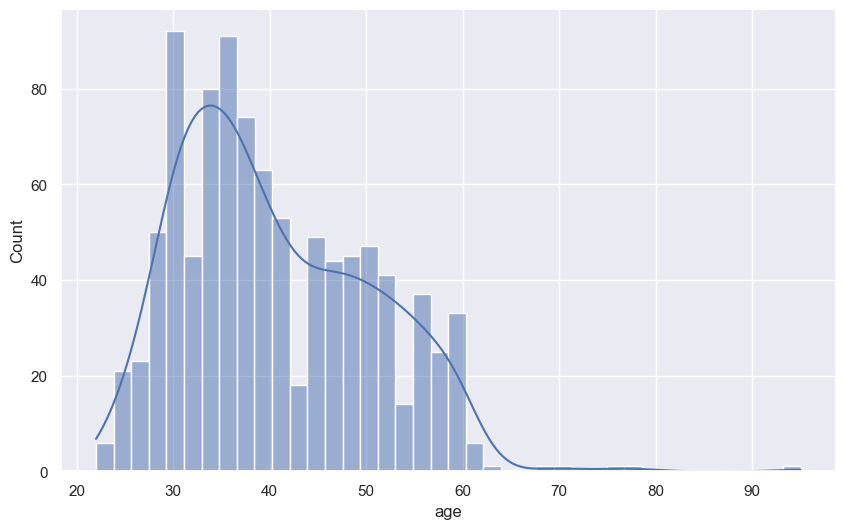

In [141]:
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins = 40, kde = True)
plt.show()

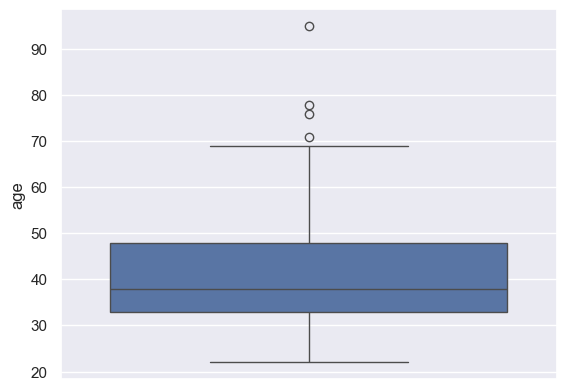

In [142]:
sns.boxplot(df['age'])
plt.show()

In [96]:
age_range = df['age'].max() - df['age'].min()

In [97]:
print('The range of the Age column is', age_range)

The range of the Age column is 73.0


In [98]:
print('The variance of the Age column is', df['age'].var())
print('The standard deviation of the Age column is', df['age'].std())

The variance of the Age column is 98.40007728792757
The standard deviation of the Age column is 9.919681309796578


Analyzing the age distribution of customers helps in segmenting marketing campaigns effectively. By understanding the range, variance, and standard deviation of customer ages, companies gain insights into the diversity and spread of their customer base. This informs targeted marketing strategies, product development, and selection of communication channels tailored to different age groups. Ultimately, such analysis facilitates more precise and impactful engagement with customers across various demographics.

7.Identify how many customers have remained with the bank for over 500 days. This information will help evaluate customer loyalty and retention rates. Comment on long-term customer retention and suggest strategies to enhance it.

if  Considering the the unit in 'duration' column is in seconds then there is no customer who stayed with the bank more than 500 days 

But, if we consider the 'duration' column unit in days then the solution will be as follows:

In [104]:
result = df[df['duration'] > 500].shape[0]

In [105]:
#dataset view
df[df['duration'] > 500]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
0,NaN,technician,single,tertiary,no,2625,no,no,cellular,29,jul,2516,2.0,-1,NaN,unknown,yes,0.708652
1,39.0,blue-collar,single,primary,no,0,yes,yes,cellular,13,may,1975,5.0,-1,NaN,unknown,yes,0.575370
2,30.0,technician,married,tertiary,no,296,no,no,cellular,22,aug,1809,5.0,-1,0.0,unknown,no,0.473304
3,32.0,admin.,single,secondary,no,678,yes,no,cellular,4,feb,1579,1.0,246,NaN,failure,yes,0.306150
4,31.0,management,divorced,tertiary,no,254,no,no,cellular,18,aug,1576,8.0,-1,NaN,unknown,yes,0.155055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,57.0,housemaid,married,primary,no,58,no,no,unknown,11,jun,510,1.0,-1,NaN,unknown,no,0.710580
117,23.0,admin.,single,secondary,no,4681,yes,no,unknown,28,may,507,2.0,-1,NaN,unknown,no,0.021304
118,40.0,technician,married,secondary,no,77,no,no,unknown,6,may,505,1.0,-1,NaN,unknown,no,0.842875
119,44.0,blue-collar,married,secondary,no,3348,no,yes,cellular,24,jul,504,2.0,-1,NaN,unknown,no,0.644732


In [107]:
print('The no of People who are with the org more than 500 days is:' , result )

The no of People who are with the org more than 500 days is: 121


Long-term customer retention is essential for sustainable business growth and profitability. It not only ensures a steady revenue stream but also reduces the cost of acquiring new customers. Here are some strategies to enhance long-term customer retention:

Personalized Customer Experience: Tailoring products, services, and communication to meet individual customer needs and preferences fosters a sense of loyalty. Utilize customer data and insights to personalize interactions, recommend relevant products, and provide customized solutions.

8.Calculate the average account balance for customers employed in blue-collar jobs. This will assist the financial planning team in understanding the financial behavior of different employment segments. Discuss the implications of these findings for financial product development and customer service strategies.

In [112]:
df[df['job']=='blue-collar']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
1,39.0,blue-collar,single,primary,no,0,yes,yes,cellular,13,may,1975,5.0,-1,NaN,unknown,yes,0.575370
6,53.0,blue-collar,married,primary,no,751,yes,no,cellular,3,feb,1528,2.0,-1,NaN,unknown,yes,0.610858
8,41.0,blue-collar,divorced,secondary,no,5291,yes,no,unknown,14,may,1423,3.0,-1,NaN,unknown,yes,0.860771
21,35.0,blue-collar,divorced,unknown,no,164,no,no,unknown,11,jun,967,2.0,-1,NaN,unknown,yes,0.880062
24,42.0,blue-collar,married,secondary,no,-355,yes,yes,unknown,5,jun,939,6.0,-1,NaN,unknown,no,0.343680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,45.0,blue-collar,married,secondary,no,141,yes,yes,unknown,14,may,21,10.0,-1,0.0,unknown,no,0.043842
974,59.0,blue-collar,married,primary,no,229,yes,yes,unknown,7,may,19,1.0,-1,NaN,unknown,no,0.792753
985,46.0,blue-collar,married,secondary,no,524,yes,no,telephone,5,may,15,7.0,-1,NaN,unknown,no,0.298009
994,41.0,blue-collar,married,primary,no,449,yes,no,cellular,20,apr,10,6.0,-1,NaN,unknown,no,0.647752


In [113]:
avg = df[df['job']=='blue-collar']['balance'].mean()

In [114]:
print('the average account balance for customers employed in blue-collar jobs is:', avg)

the average account balance for customers employed in blue-collar jobs is: 1133.0


Understanding the average account balance for customers in blue-collar jobs helps in tailoring financial products and customer service strategies. Financial institutions can develop specialized products, offer educational resources, and ensure accessibility to better serve this segment. This leads to greater customer satisfaction, loyalty, and long-term retention.

9.Determine the number of customers with a housing loan who have attained secondary education. This will help in assessing the loan penetration in various educational segments. Explain how this information can guide targeted financial literacy programs and loan marketing strategies.

In [118]:
housing_sec = df[(df['housing'] == 'yes') & (df['education'] == 'secondary')] 
df[(df['housing'] == 'yes') & (df['education'] == 'secondary')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
3,32.0,admin.,single,secondary,no,678,yes,no,cellular,4,feb,1579,1.0,246,NaN,failure,yes,0.306150
5,27.0,admin.,married,secondary,no,-97,yes,no,unknown,18,jun,1528,2.0,-1,NaN,unknown,yes,0.543888
7,40.0,technician,married,secondary,yes,-432,yes,yes,cellular,20,aug,1464,3.0,-1,NaN,unknown,no,0.308207
8,41.0,blue-collar,divorced,secondary,no,5291,yes,no,unknown,14,may,1423,3.0,-1,NaN,unknown,yes,0.860771
12,30.0,admin.,single,secondary,yes,-35,yes,no,unknown,14,may,1204,4.0,-1,NaN,unknown,no,0.747495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,46.0,blue-collar,married,secondary,no,524,yes,no,telephone,5,may,15,7.0,-1,NaN,unknown,no,0.298009
987,30.0,services,divorced,secondary,no,1016,yes,no,NaN,29,may,14,1.0,-1,NaN,unknown,no,0.124852
992,56.0,technician,married,secondary,no,378,yes,yes,cellular,20,apr,12,2.0,-1,NaN,unknown,no,0.946927
995,28.0,blue-collar,married,secondary,no,373,yes,no,cellular,14,may,10,9.0,344,NaN,failure,no,0.076747


In [122]:
print('the number of customers with a housing loan who have attained secondary education is :', len(housing_sec) )

the number of customers with a housing loan who have attained secondary education is : 321


Filtering the dataset to include customers with housing loans who have attained secondary education helps assess loan penetration across educational segments. This information guides targeted financial literacy programs by identifying areas where housing loan awareness may be lacking. For loan marketing strategies, understanding the distribution informs tailored campaigns aimed at individuals with secondary education backgrounds, emphasizing loan benefits relevant to their educational attainment level. Such targeted efforts can enhance loan uptake and engagement within this segment, contributing to overall loan portfolio growth and customer satisfaction.

10.Calculate the average duration that ‘single’ customers with a personal loan have been with the bank. This analysis will help in understanding the relationship longevity for specific customer profiles. How the bank can leverage this information to improve customer satisfaction and retention?

In [128]:
single_loan = df[(df['marital'] == 'single') & (df['loan'] == 'yes')]['duration'].mean().round(2)
df[(df['marital'] == 'single') & (df['loan'] == 'yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
1,39.0,blue-collar,single,primary,no,0,yes,yes,cellular,13,may,1975,5.0,-1,NaN,unknown,yes,0.575370
61,30.0,technician,single,secondary,no,-522,yes,yes,NaN,5,may,670,2.0,286,NaN,failure,yes,0.549745
85,32.0,blue-collar,single,secondary,no,681,no,yes,cellular,13,may,589,1.0,-1,NaN,unknown,no,0.296499
133,28.0,technician,single,secondary,no,390,no,yes,cellular,23,jul,475,2.0,-1,NaN,unknown,no,0.773788
154,29.0,technician,single,secondary,no,-496,yes,yes,cellular,22,jul,422,8.0,-1,NaN,unknown,no,0.953339
173,31.0,technician,single,tertiary,no,1887,no,yes,NaN,21,may,389,1.0,-1,NaN,unknown,no,0.001010
198,27.0,blue-collar,single,secondary,no,137,no,yes,cellular,25,jul,359,1.0,-1,0.0,unknown,no,0.481809
211,50.0,admin.,single,secondary,no,167,no,yes,cellular,4,feb,346,2.0,191,NaN,failure,no,0.479697
229,27.0,admin.,single,secondary,no,454,no,yes,cellular,15,jul,331,2.0,-1,NaN,unknown,no,0.358042
257,34.0,admin.,single,secondary,no,10,no,yes,unknown,29,may,310,3.0,-1,NaN,unknown,no,0.689047


In [131]:
print('the average duration that single customers with a personal loan have been with the bank : ',single_loan )

the average duration that single customers with a personal loan have been with the bank :  300.14


Analyzing the average duration of 'single' customers with personal loans helps the bank understand relationship longevity within this specific customer segment. Leveraging this information, the bank can tailor customer service efforts, identify and mitigate churn risks, customize product offerings, enhance communication strategies, and continuously gather feedback to improve overall customer satisfaction and retention. By implementing targeted strategies based on relationship duration, the bank can strengthen customer relationships, foster loyalty, and drive long-term profitability.

11.Discuss the implications and benefits of creating dummy variables for categorical data fields. This will aid in preparing the dataset for advanced statistical analyses. (Prepare the dataset by creating dummy variables for the required fields).

Creating dummy variables for categorical data fields is crucial for advanced statistical analysis as it allows inclusion of categorical variables in regression models and other statistical techniques. By converting categorical variables into binary variables (0 or 1), dummy variables enable the incorporation of qualitative data into quantitative models. This approach also prevents the misinterpretation of categorical data as continuous, ensuring accurate and meaningful results. Overall, Creating dummy variables for categorical data fields is like translating different categories into a language that statistical models understand

Different methods:
1. .replace
2. use cat.code
3. use standard functions used in machine learning from sklearn libraries like LabelEncoder()

for the following solution I have used the 3rd method that is using LabelEncoder()

In [134]:
from sklearn.preprocessing import LabelEncoder
# we can convert categorical data to numerical data using LabelEncoder

In [137]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
count,1000,988,1000,1000,1000,1000,979,1000,1000,1000
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,247,591,530,978,570,831,633,313,844,905


from the object type columns we have 4 categorical binary columns having yes/no as their values , those are default, housing, loan and term deposit

By using LabelEncoder we can convert the categorical(non numerical) binary values into Numeric values

yes -> 1

no - > 0

In [140]:
le = LabelEncoder()
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['term_deposit'] = le.fit_transform(df['term_deposit'])

# converted DataFrame
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,rand
0,NaN,technician,single,tertiary,0,2625,0,0,cellular,29,jul,2516,2.0,-1,NaN,unknown,1,0.708652
1,39.0,blue-collar,single,primary,0,0,1,1,cellular,13,may,1975,5.0,-1,NaN,unknown,1,0.575370
2,30.0,technician,married,tertiary,0,296,0,0,cellular,22,aug,1809,5.0,-1,0.0,unknown,0,0.473304
3,32.0,admin.,single,secondary,0,678,1,0,cellular,4,feb,1579,1.0,246,NaN,failure,1,0.306150
4,31.0,management,divorced,tertiary,0,254,0,0,cellular,18,aug,1576,8.0,-1,NaN,unknown,1,0.155055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28.0,blue-collar,married,secondary,0,373,1,0,cellular,14,may,10,9.0,344,NaN,failure,0,0.076747
996,36.0,services,single,secondary,0,760,0,0,unknown,20,jun,9,13.0,-1,NaN,unknown,0,0.543391
997,35.0,technician,single,tertiary,0,576,0,0,cellular,28,aug,8,13.0,-1,NaN,unknown,0,0.148097
998,NaN,services,married,secondary,0,901,1,0,unknown,20,jun,8,6.0,-1,NaN,unknown,0,0.226016


12.Identify any outliers in the dataset. Understanding these anomalies will help in cleaning the data and improving the accuracy of subsequent analyses. Discuss the potential impact of outliers on data analysis and the steps that can be taken to address them, such as removal or transformation.

In [143]:
df = pd.read_excel('Bank Customer_v0.1.xlsx')

In [202]:
# Statistical overview for the numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous,rand
count,963.000000,1000.000000,1000.000000,1000.000000,994.000000,1000.000000,110.000000,1000.000000
mean,40.544133,1356.728000,15.873000,252.918000,3.012072,34.596000,0.263636,0.489143
std,9.919681,3518.558897,8.245414,253.527587,3.654221,93.114043,0.672900,0.288049
min,22.000000,-1212.000000,1.000000,6.000000,1.000000,-1.000000,0.000000,0.000106
25%,33.000000,64.000000,9.000000,100.000000,1.000000,-1.000000,0.000000,0.235026
50%,38.000000,388.500000,16.000000,176.000000,2.000000,-1.000000,0.000000,0.484600
75%,48.000000,1255.500000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.740561
max,95.000000,64343.000000,31.000000,2516.000000,41.000000,422.000000,4.000000,0.996862


### Visualizing outliers for each numerical columns

Number of outliers:
age           4
balance     117
day           0
duration     68
campaign     77
pdays       156
previous     19
rand          0
dtype: int64


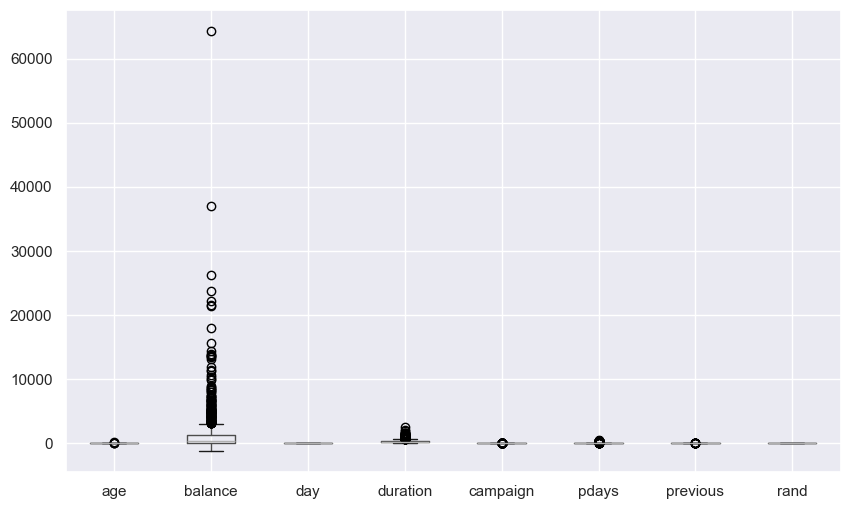

In [208]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the Inter Quartile Range for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for identifying outliers
threshold = 1.5

# Identifying outliers
outliers = (df[numerical_cols] < (Q1 - threshold * IQR)) | (df[numerical_cols] > (Q3 + threshold * IQR))

print("Number of outliers:")
print(outliers.sum())

# Visualizing the outliers with the help of a Box Plot
plt.figure(figsize=(10,6))
df[numerical_cols].boxplot()
plt.show()